In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json

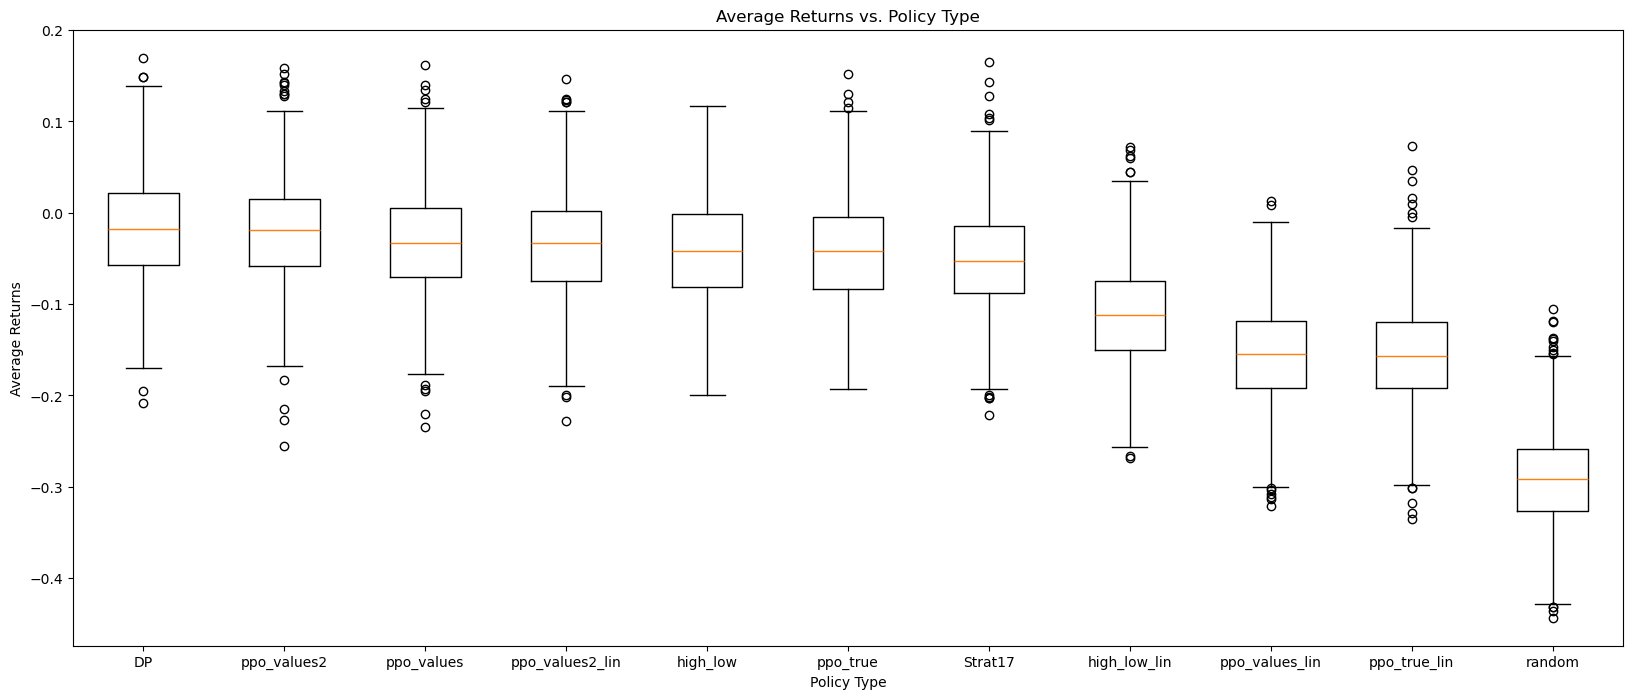

In [2]:
with open('evaluations.csv', 'r') as f:
    info = pd.read_csv('evaluations.csv').iloc[:, 1:]

sorted_columns = info.median().sort_values().index
info_sorted = info[sorted_columns[::-1]]

dictionary = info_sorted.to_dict(orient='list')

fig, ax = plt.subplots(figsize=(20, 8))
ax.boxplot(list(dictionary.values()))
ax.set_xticklabels(list(dictionary.keys()))
ax.set_ylabel("Average Returns")
ax.set_xlabel("Policy Type")
ax.set_title("Average Returns vs. Policy Type")
plt.savefig('boxplots.png')


In [3]:
info_sorted.describe()

,DP,ppo_values2,ppo_values,ppo_values2_lin,high_low,ppo_true,Strat17,high_low_lin,ppo_values_lin,ppo_true_lin,random
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.016972,-0.021788,-0.032758,-0.036057,-0.041680,-0.043190,-0.052128,-0.112355,-0.155082,-0.155837,-0.290838
std,0.057630,0.058134,0.057066,0.056936,0.054619,0.057999,0.058163,0.058661,0.056046,0.057535,0.055213
min,-0.208333,-0.255000,-0.235000,-0.228333,-0.200000,-0.193333,-0.221667,-0.268333,-0.321667,-0.335000,-0.443333
25%,-0.056667,-0.058750,-0.070000,-0.075000,-0.081667,-0.083333,-0.088333,-0.150000,-0.191667,-0.191667,-0.326667
50%,-0.017500,-0.018333,-0.033333,-0.033333,-0.041667,-0.041667,-0.053333,-0.111667,-0.155000,-0.156667,-0.291667
75%,0.021667,0.015000,0.005000,0.002083,-0.001667,-0.005000,-0.015000,-0.075000,-0.118333,-0.120000,-0.258333
max,0.170000,0.158333,0.161667,0.146667,0.116667,0.151667,0.165000,0.071667,0.013333,0.073333,-0.105000


In [4]:
colors = [
    ("#1f77b4", "#aec7e8"),  # Blue and light blue
    ("#ff7f0e", "#ffbb78"),  # Orange and light orange
    ("#2ca02c", "#98df8a"),  # Green and light green
    ("#d62728", "#ff9896")   # Red and light red
]

results_list = [('high_low_lin', 'test_results/final5/HIGH_LOW,[1]/training_results.json', colors[0][1]),
                ('high_low', 'test_results/final5/HIGH_LOW,None/training_results.json', colors[0][0]),
                ('true_lin', 'test_results/final5/TRUE,[1]/training_results.json', colors[1][1]),
                ('true', 'test_results/final5/TRUE,None/training_results.json', colors[1][0]),
                ('values_lin', 'test_results/final5/VALUES,[1]/training_results.json', colors[2][1]), 
                ('values', 'test_results/final5/VALUES,None/training_results.json', colors[2][0]),
                ('values2_lin', 'test_results/final5/VALUES2,[1]/training_results.json', colors[3][1]),
                 ('values2', 'test_results/final5/VALUES2,None/training_results.json', colors[3][0]),

                ]

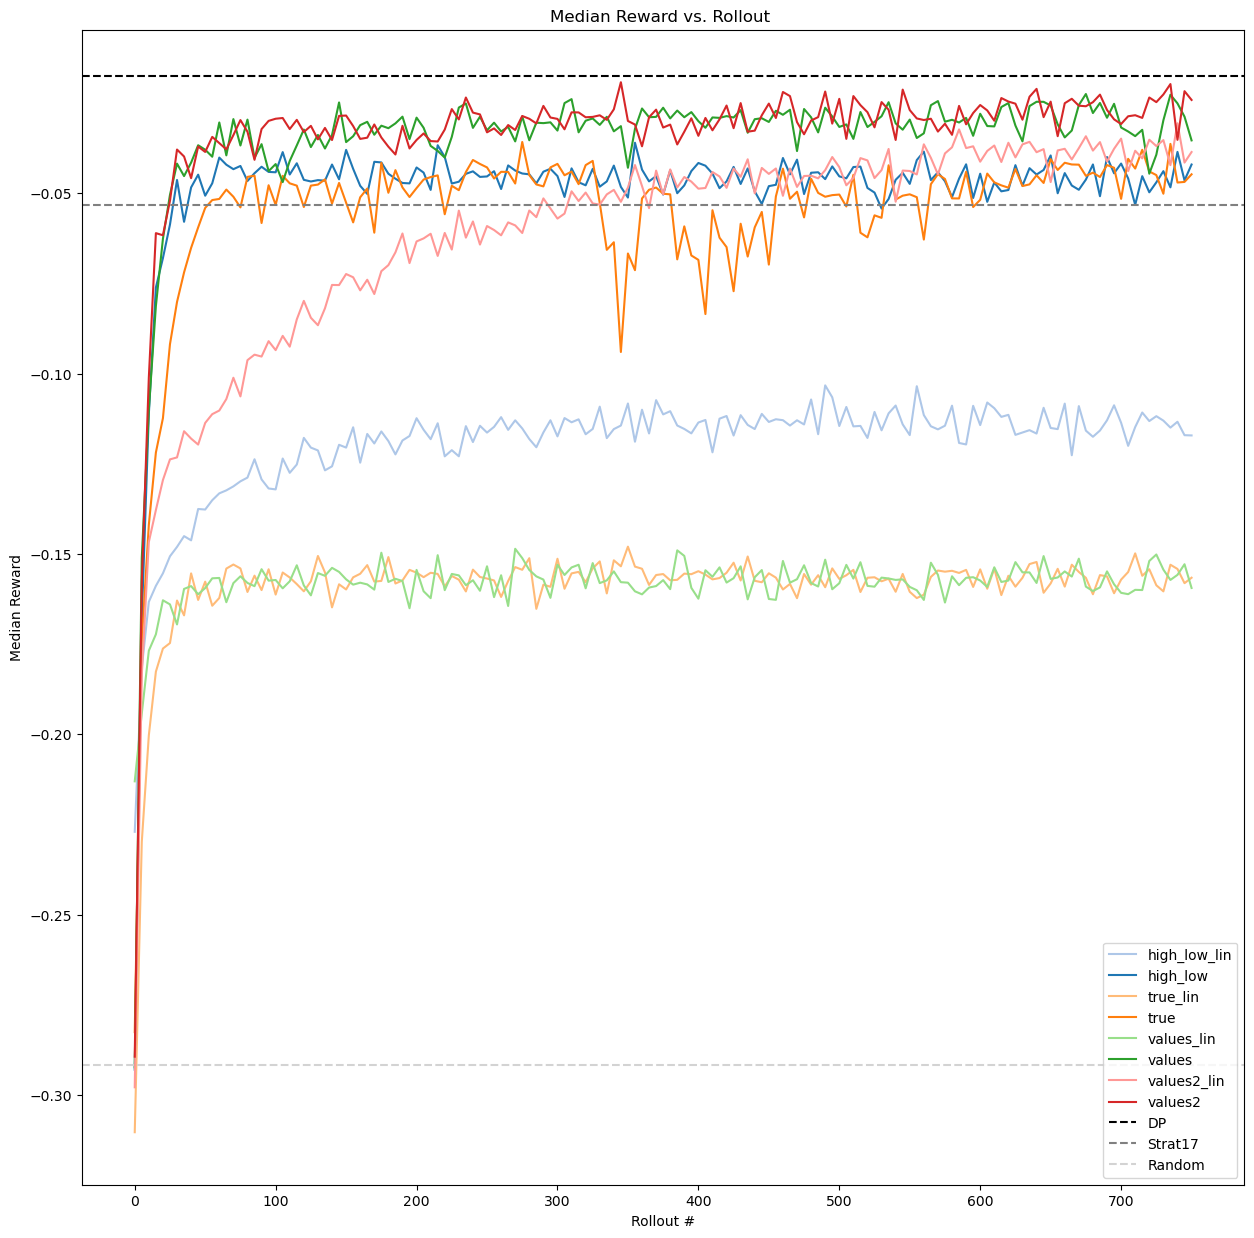

In [5]:
plt.figure(figsize=(15, 15))
for name, info_str, color in results_list:
    with open(info_str, 'r') as f:
        info = json.load(f)
        plt.plot(info['x_choices'], info['medians'], label = name, color = color)

plt.axhline(y=info_sorted.describe()['DP']['50%'], color = 'black', linestyle='--', label='DP')
plt.axhline(y=info_sorted.describe()['Strat17']['50%'], color = 'grey', linestyle='--', label='Strat17')
plt.axhline(y=info_sorted.describe()['random']['50%'], color = 'lightgrey', linestyle='--', label='Random')

plt.title("Median Reward vs. Rollout ")
plt.xlabel("Rollout #")
plt.ylabel("Median Reward")
plt.legend()
plt.savefig('rltrain_results')

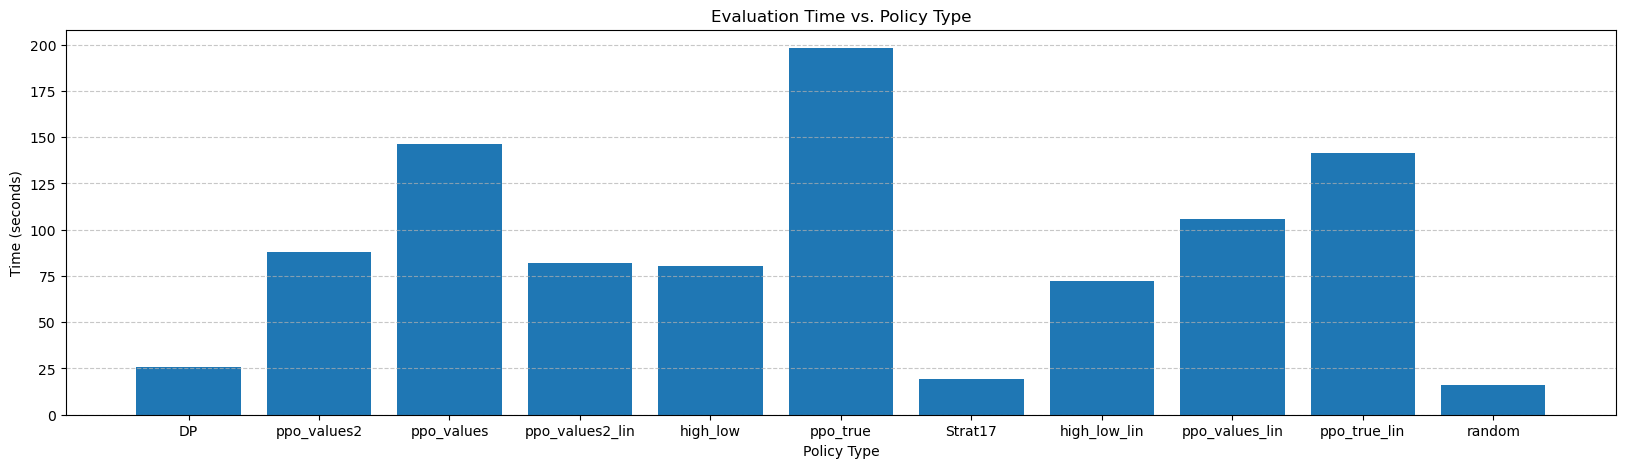

In [ ]:
with open('times.json', 'r') as f:
    times = json.load(f)

names = list(dictionary.keys())
values = [times[name] for name in names]

# Plotting
plt.figure(figsize=(20, 5))
plt.bar(names, values)
plt.title('Evaluation Time vs. Policy Type')
plt.xlabel('Policy Type')
plt.ylabel('Time (seconds)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()